Basic:  
* Reading Image and Video
* Image Transformations
* Drawing Shapes
* Putting Text  

Advanced:
* Color Spaces
* BITWISE operations
* Masking
* Histogram Computation
* Edge Detection

Faces:  
* Face Detection
* Face REcognition
* Deep computer Vision

In [1]:
# import opencv
import cv2 as cv

In [3]:
# read image
img = cv.imread("Resources/Photos/cat.jpg")
#img = cv.imread("Resources/Photos/cat_large.jpg")
cv.imshow("Cat", img)

cv.waitKey(0)
# express in new window

-1

In [3]:
# reading video
capture = cv.VideoCapture("Resources/Videos/dog.mp4")

# reading video frame by frame
while True:
    isTrue, frame = capture.read()
    try:
        cv.imshow('Video', frame)
        if cv.waitKey(20) & 0xFF==ord('q'):
            break
    except:
        break
        
capture.release()
cv.destroyAllWindows()

In [2]:
# Resizing and Rescaking Frames

def rescaleFrame(frame, scale=0.5):
    # image, video, live video
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    
    dimensions = (width, height)
    
    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)

capture = cv.VideoCapture("Resources/Videos/dog.mp4")

# reading video frame by frame
while True:
    isTrue, frame = capture.read()
    
    frame_resized = rescaleFrame(frame)
    
    #cv.imshow('Video', frame)
    cv.imshow('Video Resized', frame_resized)
    
    if cv.waitKey(20) & 0xFF==ord('d'):
        break
        
capture.release()
cv.destroyAllWindows()
# need to resize the frame

AttributeError: 'NoneType' object has no attribute 'shape'

In [4]:
def changeRes(width, height):
    # only live video
    capture.set(3, width)
    capture.set(4, height)

In [1]:
import cv2 as cv
import numpy as np

In [8]:
# Drawing Shapes & Putting Text

blank = np.zeros((500, 500, 3), dtype='uint8')

img = cv.imread('Resources/Photos/cat.jpg')

cv.imshow('Blank', blank)

# 1. paint the Image
blank[200:300, 300:400] = 0, 255, 0

#cv.imshow('Another', blank)

# 2. Draw a Rectangle
cv.rectangle(blank, (0,0), (250,250), (0,0,255), thickness=1)
#cv.imshow('Another', blank)

# 3. Draw a circle
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (255,0,0), thickness=-1)
#cv.imshow('Another', blank)

# 4. Draw a line
cv.line(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), (255, 255, 255), thickness=3)
#cv.imshow('Another', blank)

# 5. Write text
cv.putText(blank, 'Hello', (300, 300), cv.FONT_HERSHEY_TRIPLEX, 1.0, (255,255,255), 2)
cv.imshow('Another', blank)

cv.waitKey(0)

-1

In [3]:
# Essential function
import cv2 as cv

img = cv.imread('Resources/Photos/cat.jpg')
cv.imshow('Cat', img)

# 1. converting to grayscale
#gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#cv.imshow('Gray', gray)

# 2 Blur 模糊
# blur = cv.GaussianBlur(img, (3,3), cv.BORDER_DEFAULT)
# cv.imshow('Blur', blur)

# 3 Edge Cascade
canny = cv.Canny(img, 125, 175)
# cv.imshow("Canny Edge", canny)

# 4 Dilating the image
dilated = cv.dilate(canny, (3,3), iterations=1)
#cv.imshow("Dilated", dilated)

# 5 Eroding
eroded = cv.erode(dilated, (3,3), iterations=1)
cv.imshow("Erode", eroded)

# Resize
resized = cv.resize(img, (500,500))
cv.imshow('Resized', resized)

# Cropping
cropped = img[50:200, 200:400]
cv.imshow('Cropped', cropped)

cv.waitKey(0)

-1

In [1]:
import cv2 as cv
import numpy as np

In [3]:
# Image Transformations
img = cv.imread('Resources/Photos/cat.jpg')
cv.imshow('Cat', img)

# Translation
def translate(img, x, y):
    transMat = np.float32([[1, 0 , x], [0, 1, y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)
    # x --> Right
    # y --> Down
    
translated = translate(img, 100, 100)
#cv.imshow('Translated', translated)

# Rotating
def rotate(img, angle, rotPoint=None):
    (height, width) = img.shape[:2]
    
    if rotPoint is None:
        rotPoint = (width//2, height//2)
        
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (height, width)
    return cv.warpAffine(img, rotMat, dimensions)

rotated = rotate(img, 45)
cv.imshow('Rotated', rotated)

# Flip
flip = cv.flip(img, 0) # 0: vertical, 1 horizontal
cv.imshow('Flip', flip)

cv.waitKey(0)

-1

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

2794 contour(s) found!
After Blur, 380 contour(s) found!
thresh, 839 contour(s) found!


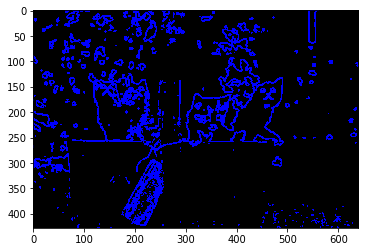

In [13]:
# Contour detecion
img = cv.imread('Resources/Photos/cats.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#cv.imshow('Gray', gray)

canny = cv.Canny(img, 125, 175)
#cv.imshow('Canny Edge', canny)

contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

print(f'{len(contours)} contour(s) found!')

blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
#cv.imshow('Blur', blur)

canny2 = cv.Canny(blur, 125, 175)
#cv.imshow('Canny2', canny2)
contours, hierarchies = cv.findContours(canny2, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'After Blur, {len(contours)} contour(s) found!')


# using threshold
ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
contours, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'thresh, {len(contours)} contour(s) found!')

# draw the countour to the blank image
blank = np.zeros(img.shape, dtype='uint8')
cv.drawContours(blank, contours, -1, (0,0,255), 2)
cv.imshow('Draw contours', blank)

cv.waitKey(0)

plt.imshow(blank)
plt.show()